In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
names = "fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class"

In [10]:
cols = names.split(",")
cols

['fLength',
 'fWidth',
 'fSize',
 'fConc',
 'fConc1',
 'fAsym',
 'fM3Long',
 'fM3Trans',
 'fAlpha',
 'fDist',
 'class']

In [37]:
df = pd.read_csv("magic04.data", names = cols)

In [38]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [39]:
df["class"] = (df["class"] == "g").astype(int)

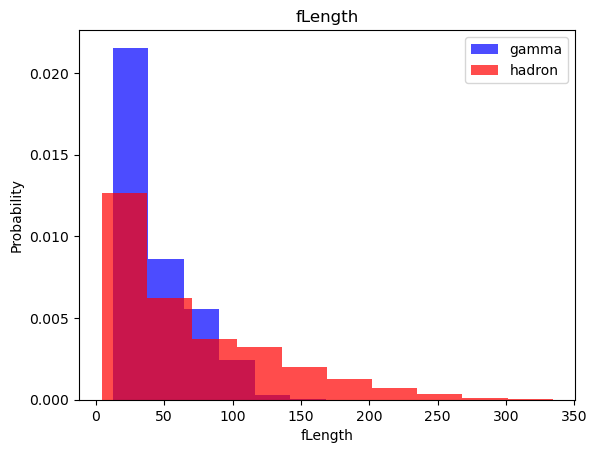

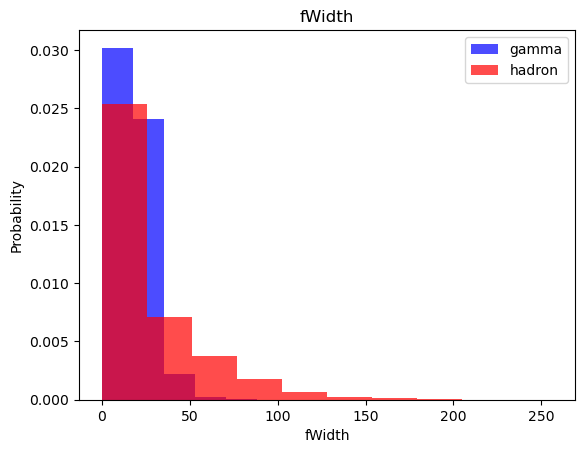

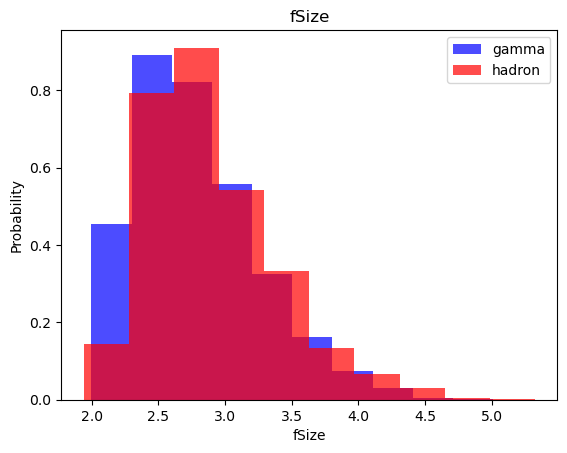

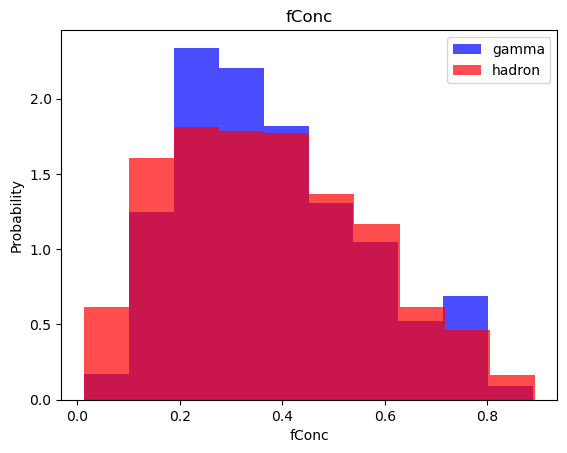

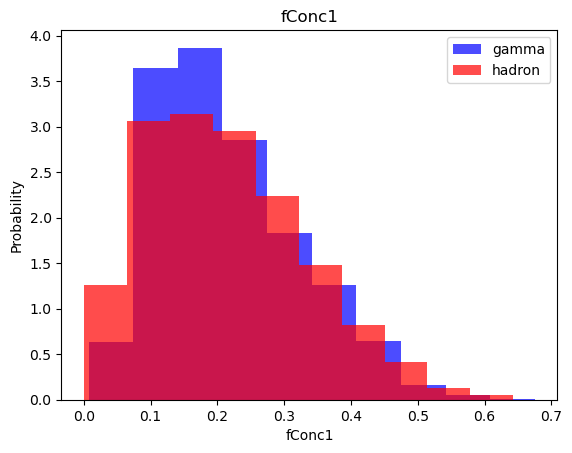

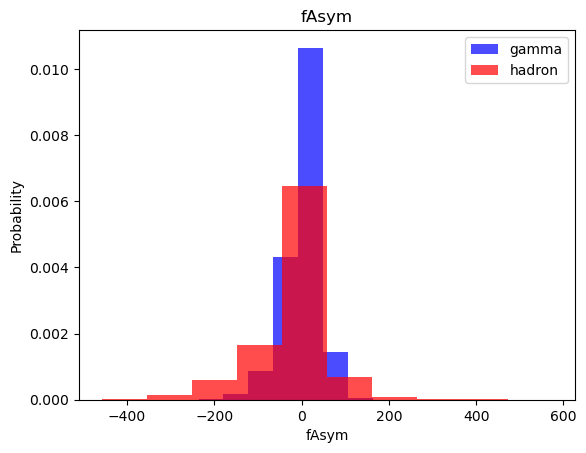

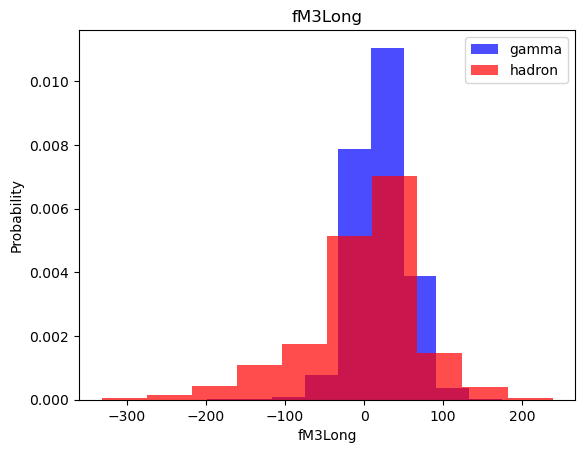

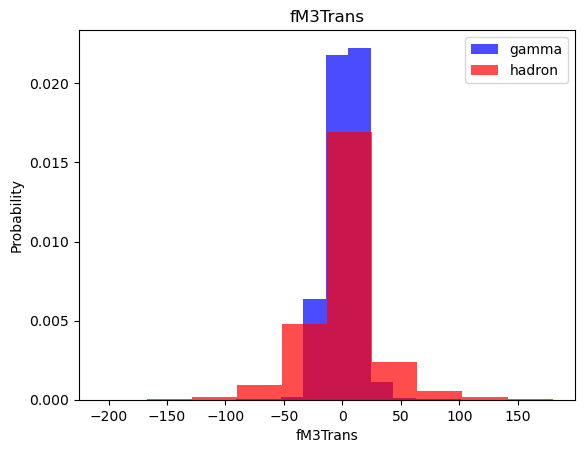

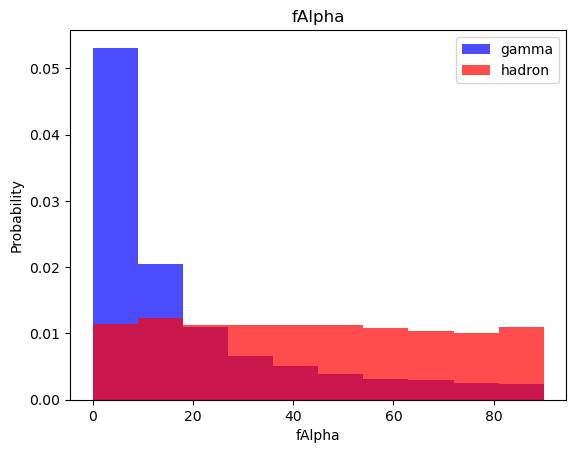

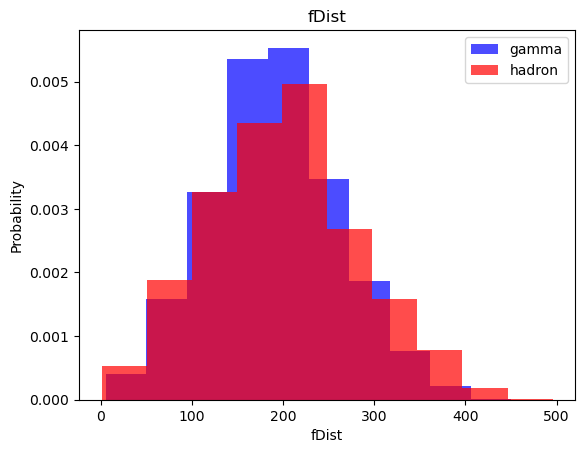

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df["class"] == 0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend(loc='best')
    plt.show()
    

In [40]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [41]:
train, valid, test = np.split(df.sample(frac = 1),[int(0.6*len(df)) , int(0.8*len(df))])

In [42]:
def scale_dataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y
    

In [43]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [44]:
len(y_train)

14842

## kNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [58]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
y_pred = knn_model.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1357
           1       0.85      0.86      0.85      2447

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

In [64]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [65]:
y_pred_naive = nb_model.predict(X_test)

In [66]:
print(classification_report(y_test, y_pred_naive))

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1357
           1       0.73      0.89      0.80      2447

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [69]:
y_pred_lg = lg_model.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1357
           1       0.84      0.81      0.83      2447

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



## SVM

In [71]:
from sklearn.svm import SVC

In [72]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [73]:
y_pred_svm = svm_model.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1357
           1       0.88      0.90      0.89      2447

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [77]:
import tensorflow as tf

In [88]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
    ax1.plot(history.history['loss'], label = 'loss')
    ax1.plot(history.history['val_loss'], label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label = 'accuracy')
    ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
                                  
    plt.legend()
    plt.show()



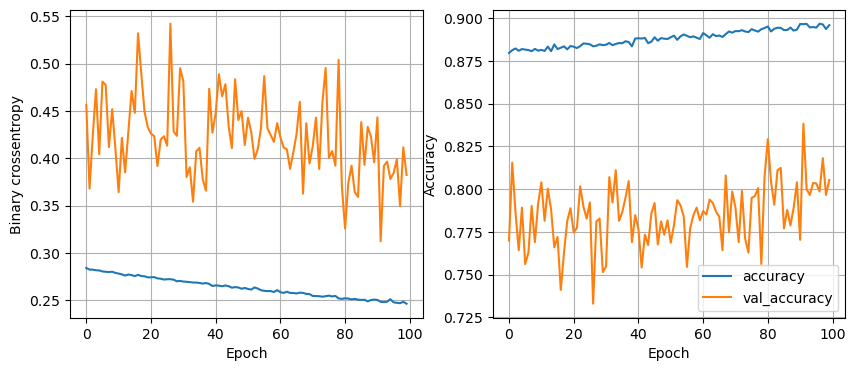

In [90]:
plot_history(history)

In [94]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape=(10, )),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation = 'relu'),
        tf.keras.layers.Dropout(dropout_prob), 
        tf.keras.layers.Dense(1, activation = 'sigmoid')

    ])
    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = nn_model.fit(
    X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)
    
    return nn_model, history

In [96]:
test_model, test_histroy = train_model(X_train, y_train, 32, 0.1, 0.001, 32, 20)

2022-11-26 08:43:25.701168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 08:43:27.882794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [98]:
test_model.evaluate(X_valid, y_valid)

119/119 [==============================] - 0s 3ms/step - loss: 0.3250 - accuracy: 0.8633


[0.32501864433288574, 0.8633018136024475]

16 nodes, drop 0, lr 0.01, batch_size 32


2022-11-26 08:45:20.560484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 08:45:22.175379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


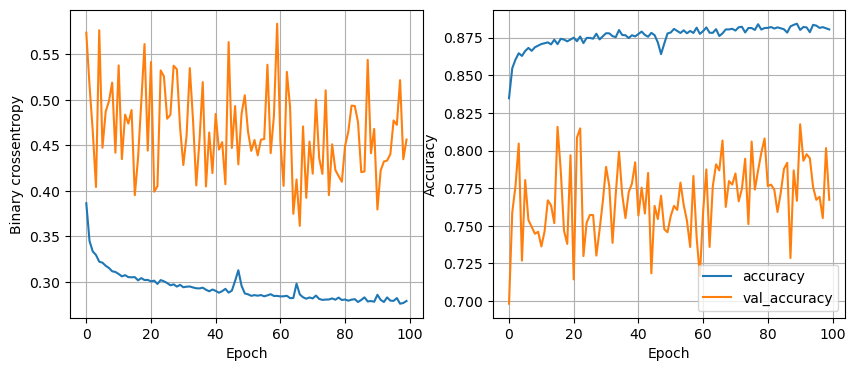

119/119 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8659
16 nodes, drop 0, lr 0.01, batch_size 64


2022-11-26 08:48:09.106558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 08:48:10.284320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


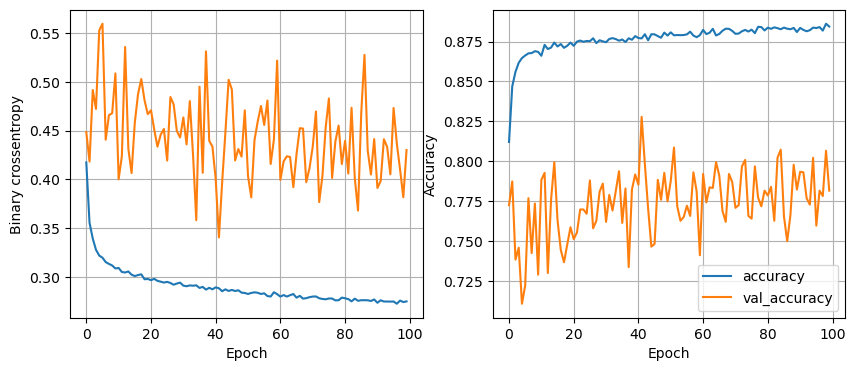

119/119 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.8667
16 nodes, drop 0, lr 0.01, batch_size 128


2022-11-26 08:49:34.621115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 08:49:35.316246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


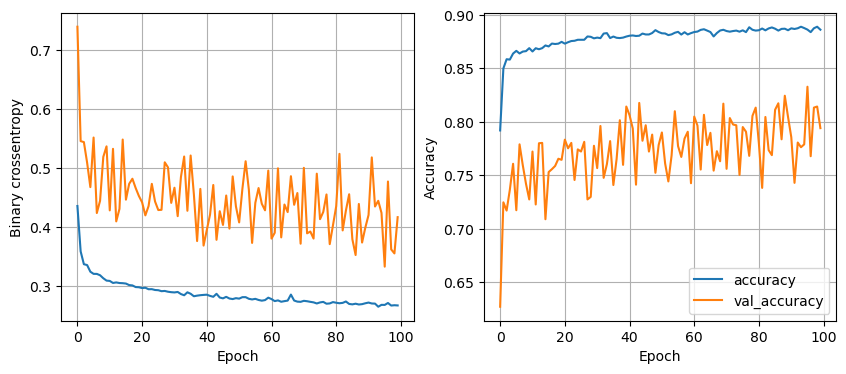

119/119 [==============================] - 0s 4ms/step - loss: 0.3286 - accuracy: 0.8728
16 nodes, drop 0, lr 0.005, batch_size 32


2022-11-26 08:50:18.730140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 08:50:20.420919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


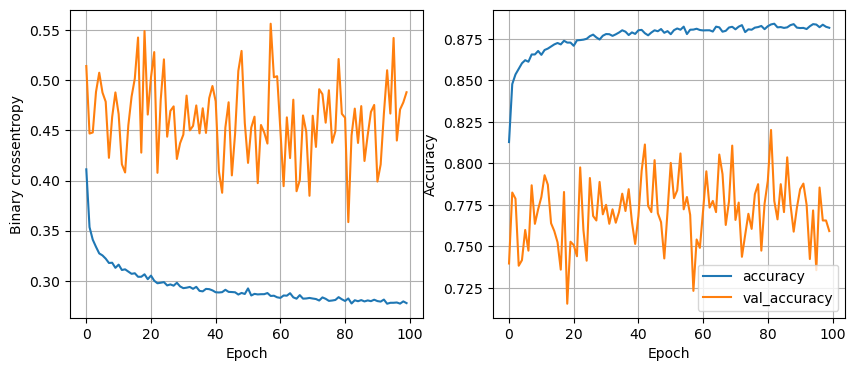

119/119 [==============================] - 0s 4ms/step - loss: 0.3407 - accuracy: 0.8678
16 nodes, drop 0, lr 0.005, batch_size 64


2022-11-26 08:53:06.897194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 08:53:07.915362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


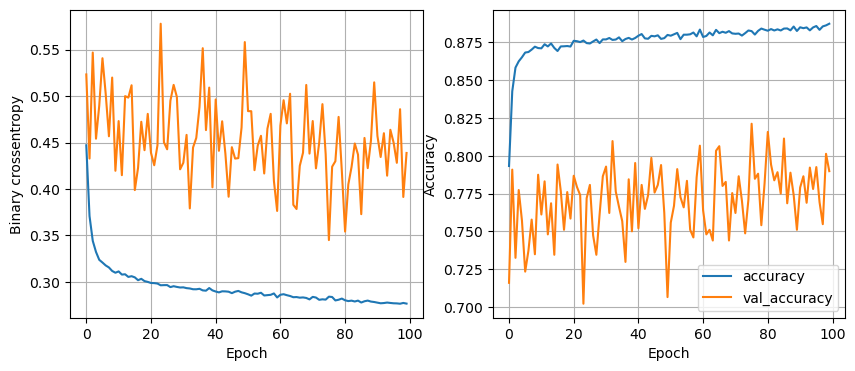

119/119 [==============================] - 0s 4ms/step - loss: 0.3378 - accuracy: 0.8693
16 nodes, drop 0, lr 0.005, batch_size 128


2022-11-26 08:54:32.240651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 08:54:32.926066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


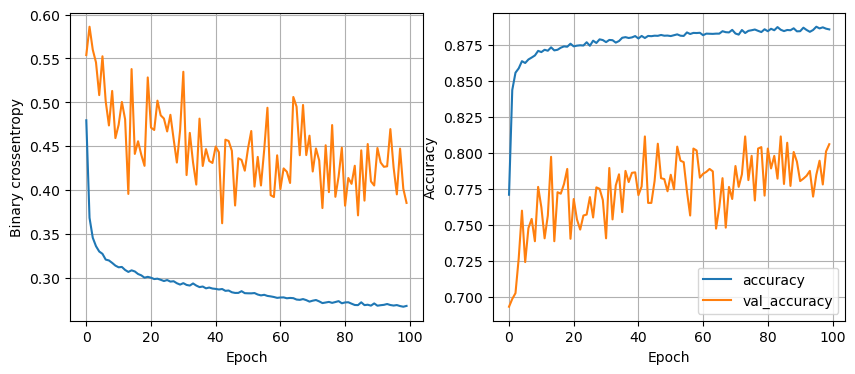

119/119 [==============================] - 0s 4ms/step - loss: 0.3245 - accuracy: 0.8707
16 nodes, drop 0, lr 0.001, batch_size 32


2022-11-26 08:55:16.510773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 08:55:18.233058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


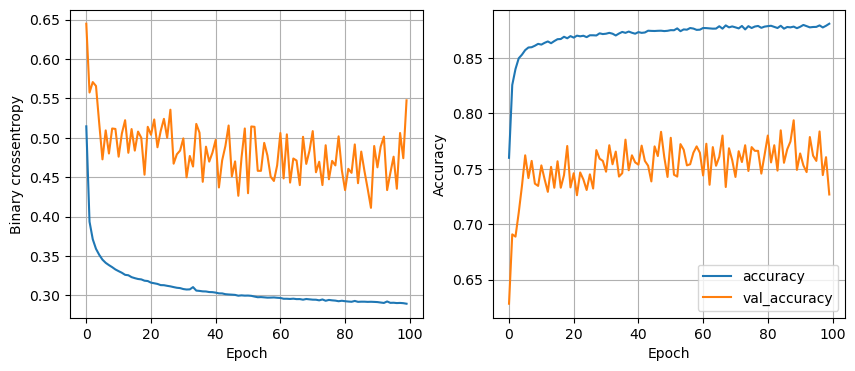

119/119 [==============================] - 0s 3ms/step - loss: 0.3257 - accuracy: 0.8620
16 nodes, drop 0, lr 0.001, batch_size 64


2022-11-26 08:58:04.279953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 08:58:05.393325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


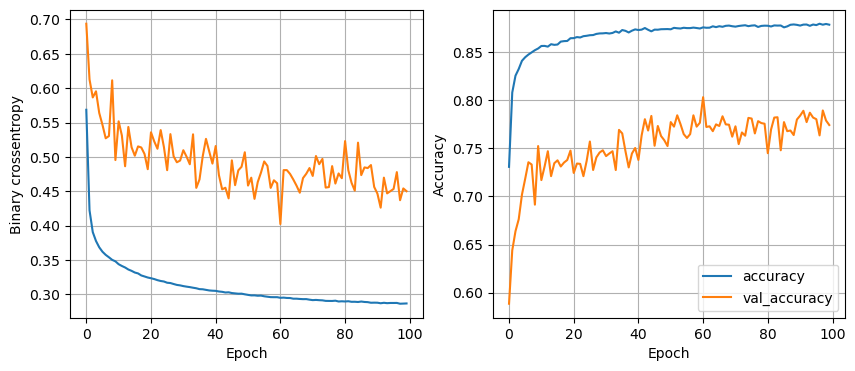

119/119 [==============================] - 0s 4ms/step - loss: 0.3261 - accuracy: 0.8675
16 nodes, drop 0, lr 0.001, batch_size 128


2022-11-26 08:59:30.089390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 08:59:30.879227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


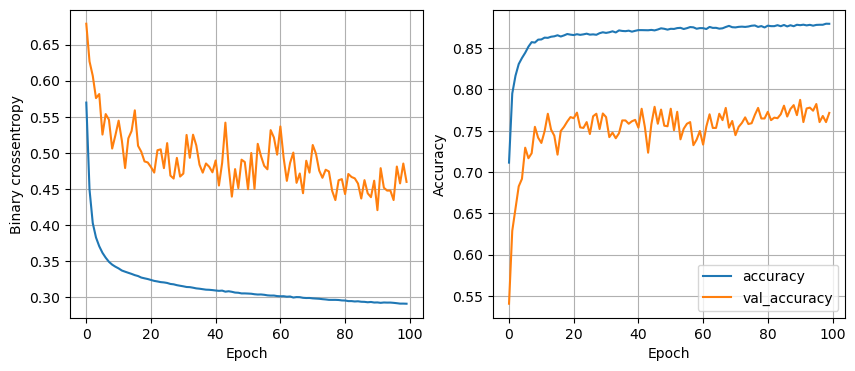

119/119 [==============================] - 1s 4ms/step - loss: 0.3245 - accuracy: 0.8717
16 nodes, drop 0.2, lr 0.01, batch_size 32


2022-11-26 09:00:59.714627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:01:01.895045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


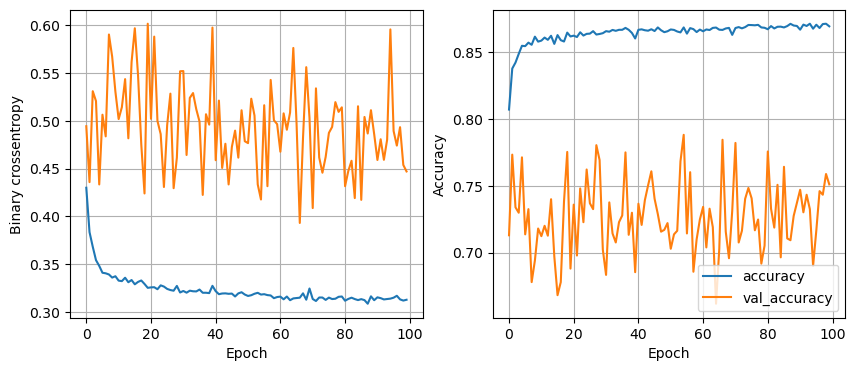

119/119 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.8728
16 nodes, drop 0.2, lr 0.01, batch_size 64


2022-11-26 09:06:11.083683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:06:12.374827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


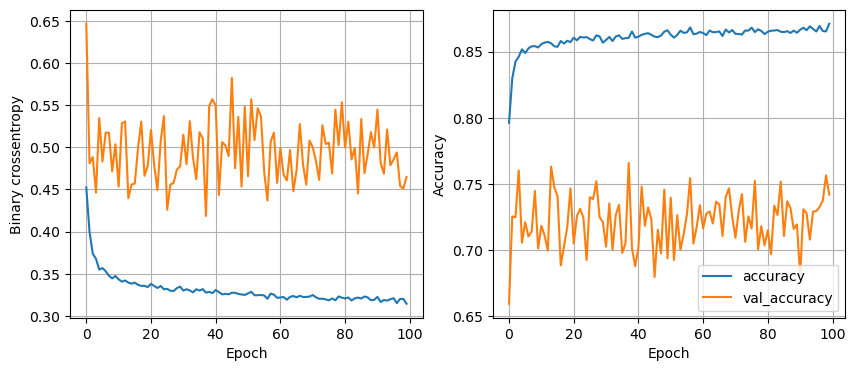

119/119 [==============================] - 1s 4ms/step - loss: 0.3291 - accuracy: 0.8675
16 nodes, drop 0.2, lr 0.01, batch_size 128


2022-11-26 09:07:47.219374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:07:48.107760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


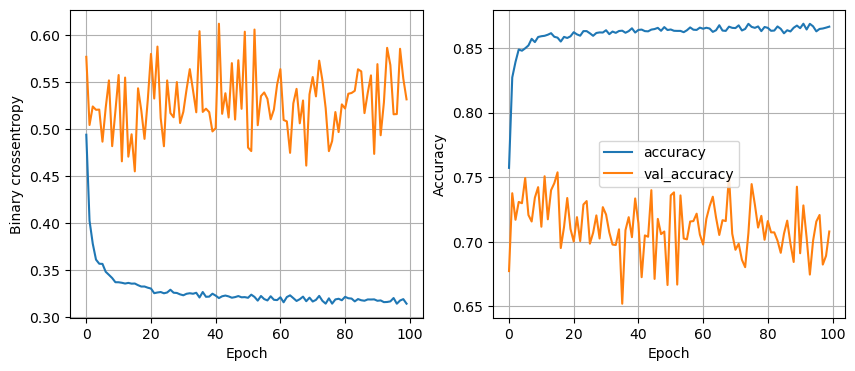

119/119 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.8617
16 nodes, drop 0.2, lr 0.005, batch_size 32


2022-11-26 09:08:35.309453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:08:37.437968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


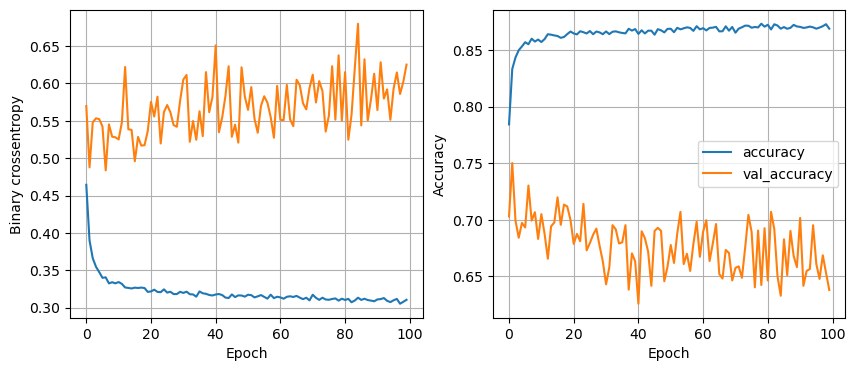

119/119 [==============================] - 0s 4ms/step - loss: 0.3391 - accuracy: 0.8502
16 nodes, drop 0.2, lr 0.005, batch_size 64


2022-11-26 09:15:31.918627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:15:33.239599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


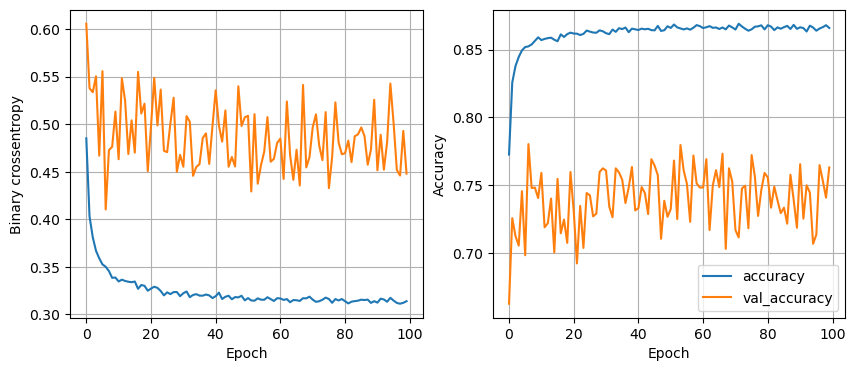

119/119 [==============================] - 1s 4ms/step - loss: 0.3260 - accuracy: 0.8659
16 nodes, drop 0.2, lr 0.005, batch_size 128


2022-11-26 09:17:04.031653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:17:05.020360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


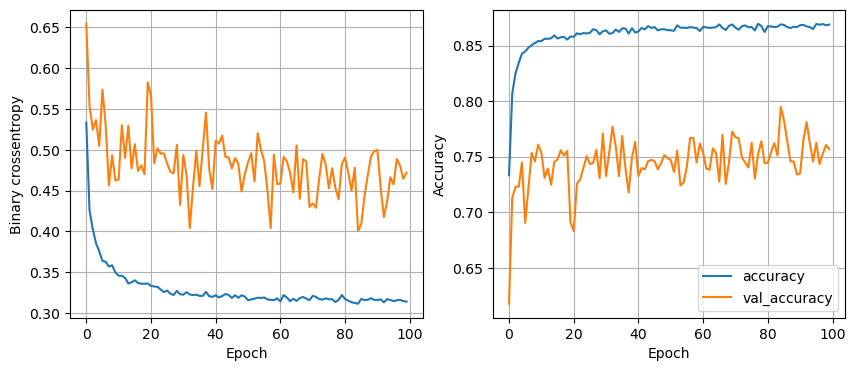

119/119 [==============================] - 1s 4ms/step - loss: 0.3170 - accuracy: 0.8688
16 nodes, drop 0.2, lr 0.001, batch_size 32


2022-11-26 09:19:38.690489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:19:40.852784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


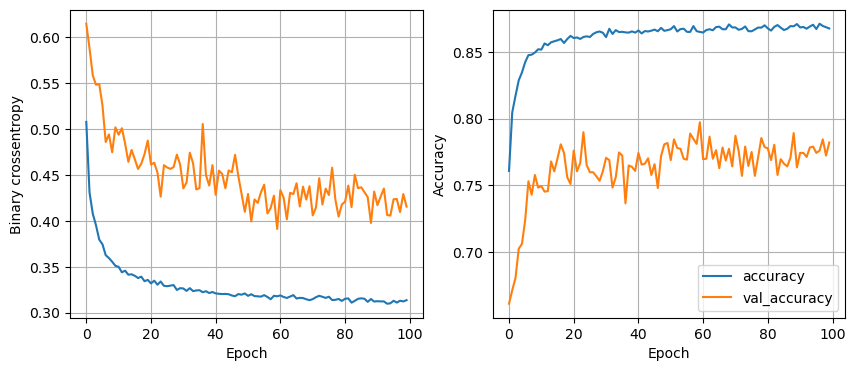

119/119 [==============================] - 0s 4ms/step - loss: 0.3248 - accuracy: 0.8680
16 nodes, drop 0.2, lr 0.001, batch_size 64


2022-11-26 09:23:30.841952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:23:32.358270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


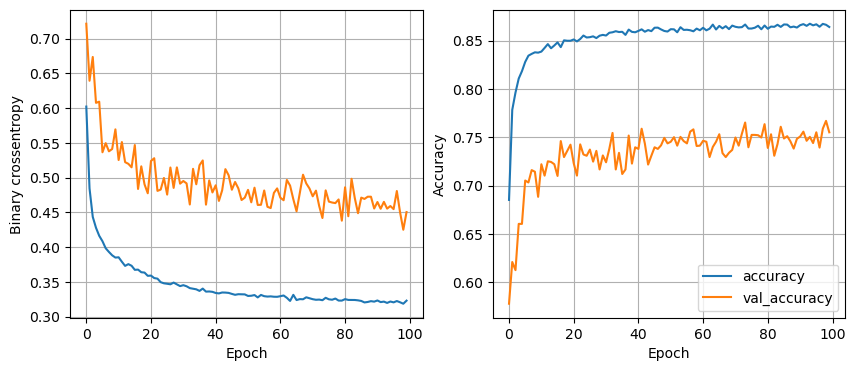

119/119 [==============================] - 1s 4ms/step - loss: 0.3300 - accuracy: 0.8683
16 nodes, drop 0.2, lr 0.001, batch_size 128


2022-11-26 09:25:03.753198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:25:04.924507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


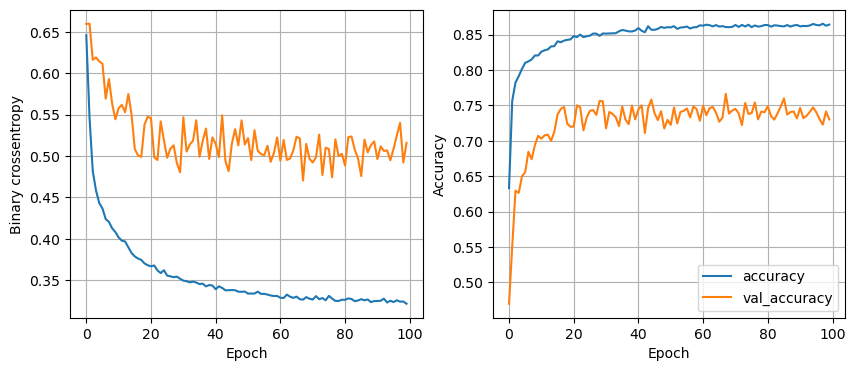

119/119 [==============================] - 1s 4ms/step - loss: 0.3267 - accuracy: 0.8659
32 nodes, drop 0, lr 0.01, batch_size 32


2022-11-26 09:25:52.220863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:25:54.330010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


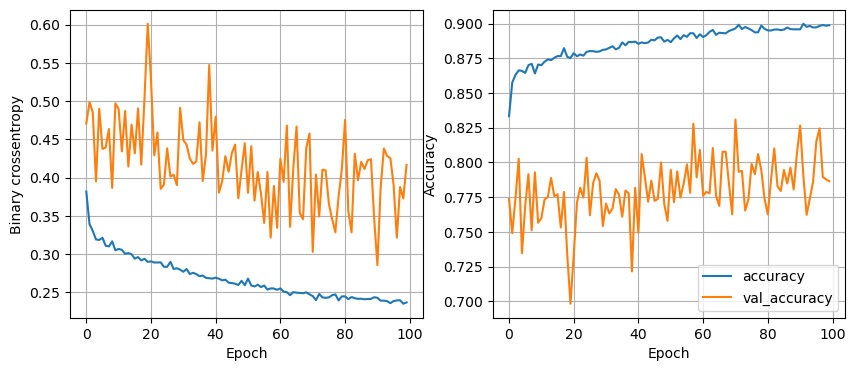

119/119 [==============================] - 0s 4ms/step - loss: 0.4373 - accuracy: 0.8667
32 nodes, drop 0, lr 0.01, batch_size 64


2022-11-26 09:31:32.406876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:31:33.640138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


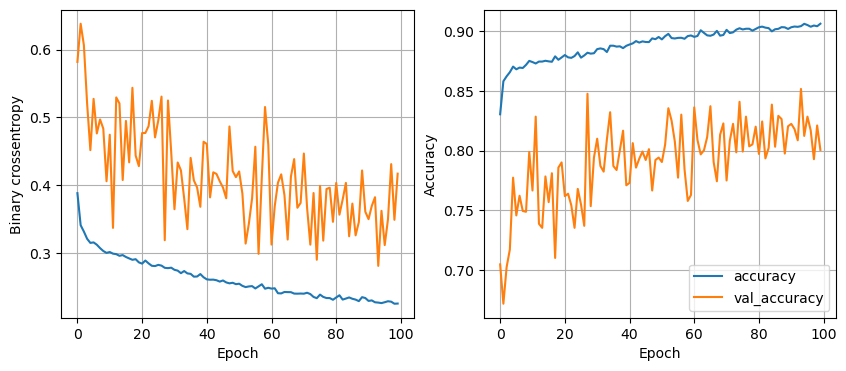

119/119 [==============================] - 1s 4ms/step - loss: 0.4054 - accuracy: 0.8683
32 nodes, drop 0, lr 0.01, batch_size 128


2022-11-26 09:32:58.535823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:32:59.471913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


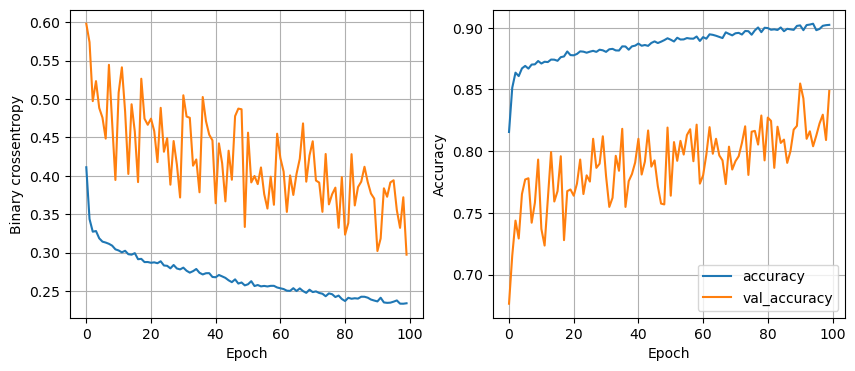

119/119 [==============================] - 1s 4ms/step - loss: 0.3800 - accuracy: 0.8588
32 nodes, drop 0, lr 0.005, batch_size 32


2022-11-26 09:33:43.395430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:33:45.339107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


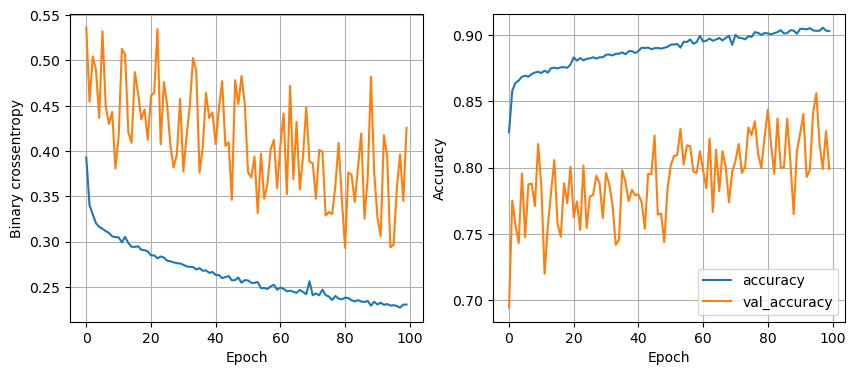

119/119 [==============================] - 0s 4ms/step - loss: 0.4267 - accuracy: 0.8625
32 nodes, drop 0, lr 0.005, batch_size 64


2022-11-26 09:39:37.078898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:39:38.328403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


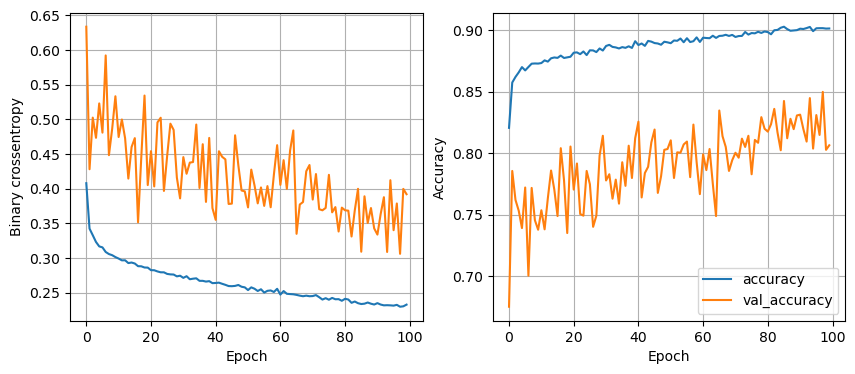

119/119 [==============================] - 1s 4ms/step - loss: 0.3817 - accuracy: 0.8601
32 nodes, drop 0, lr 0.005, batch_size 128


2022-11-26 09:41:03.092714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:41:04.046376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


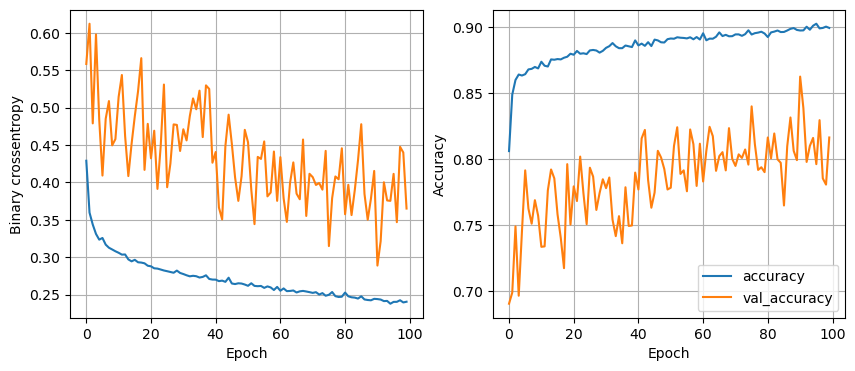

119/119 [==============================] - 1s 4ms/step - loss: 0.3557 - accuracy: 0.8662
32 nodes, drop 0, lr 0.001, batch_size 32


2022-11-26 09:43:36.228105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:43:38.314819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


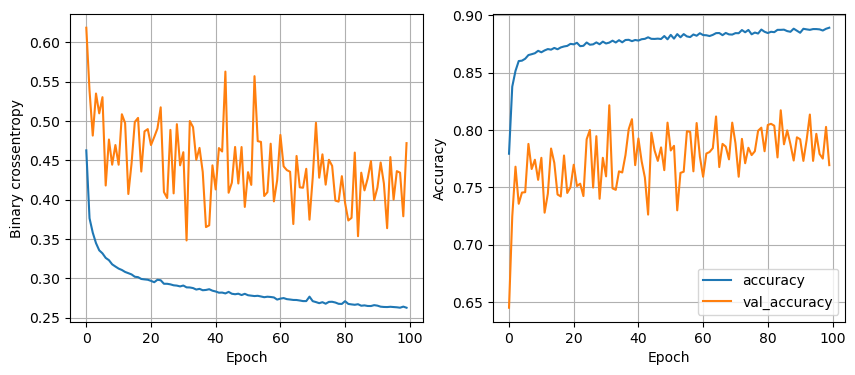

119/119 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.8688
32 nodes, drop 0, lr 0.001, batch_size 64


2022-11-26 09:47:54.987238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:47:56.357033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


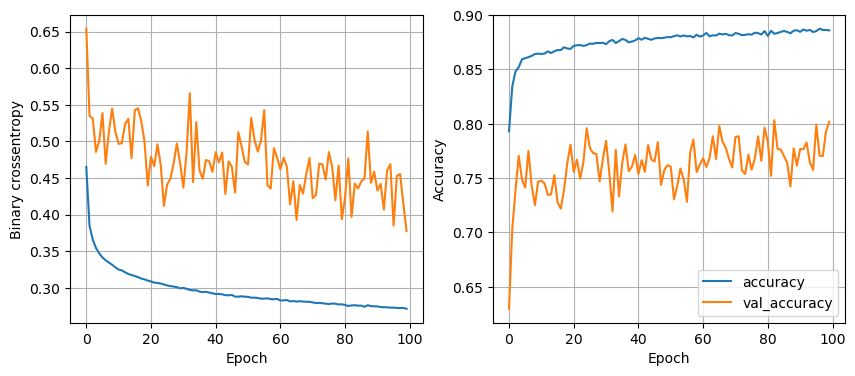

119/119 [==============================] - 1s 4ms/step - loss: 0.3360 - accuracy: 0.8630
32 nodes, drop 0, lr 0.001, batch_size 128


2022-11-26 09:49:21.301778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:49:22.320989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


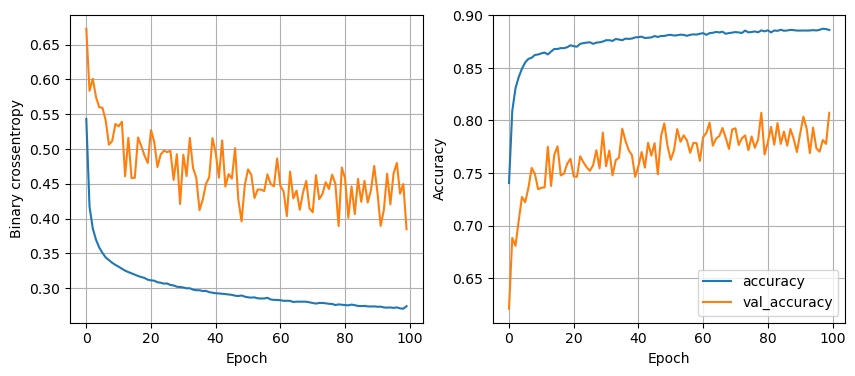

119/119 [==============================] - 1s 4ms/step - loss: 0.3261 - accuracy: 0.8715
32 nodes, drop 0.2, lr 0.01, batch_size 32


2022-11-26 09:50:06.575980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:50:08.977790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


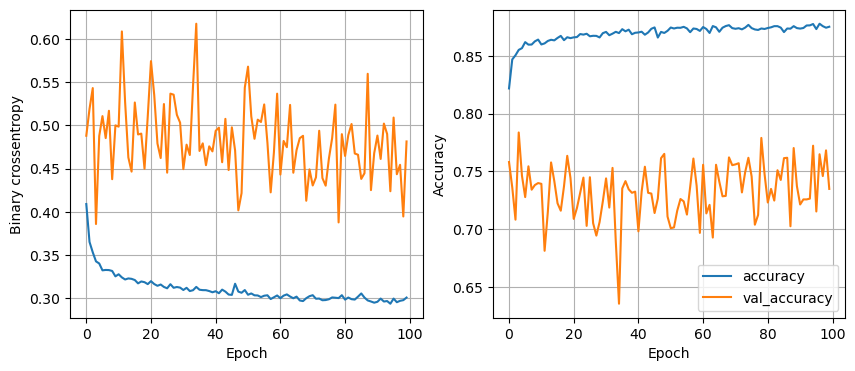

119/119 [==============================] - 0s 4ms/step - loss: 0.3367 - accuracy: 0.8638
32 nodes, drop 0.2, lr 0.01, batch_size 64


2022-11-26 09:53:09.319483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:53:10.967464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


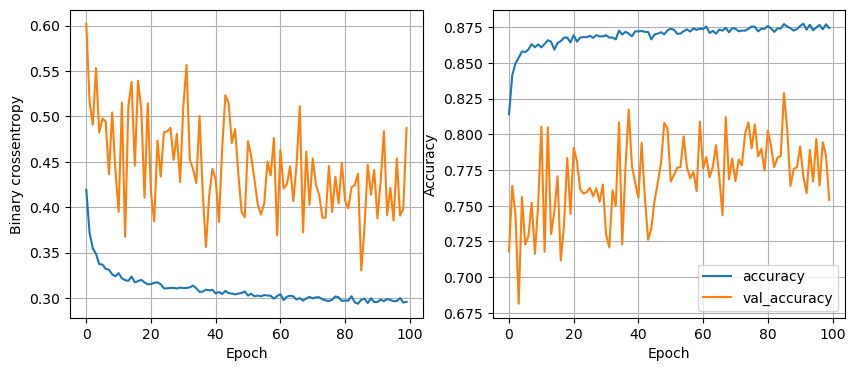

119/119 [==============================] - 1s 4ms/step - loss: 0.3203 - accuracy: 0.8638
32 nodes, drop 0.2, lr 0.01, batch_size 128


2022-11-26 09:54:42.639046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:54:43.923925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


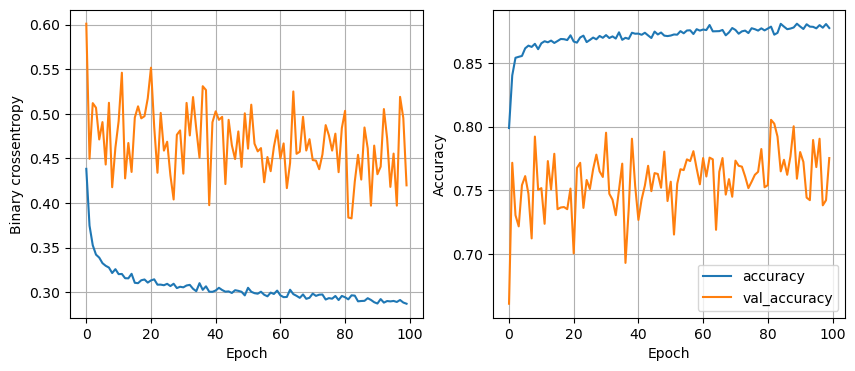

119/119 [==============================] - 1s 4ms/step - loss: 0.3172 - accuracy: 0.8696
32 nodes, drop 0.2, lr 0.005, batch_size 32


2022-11-26 09:55:31.834131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:55:34.294462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


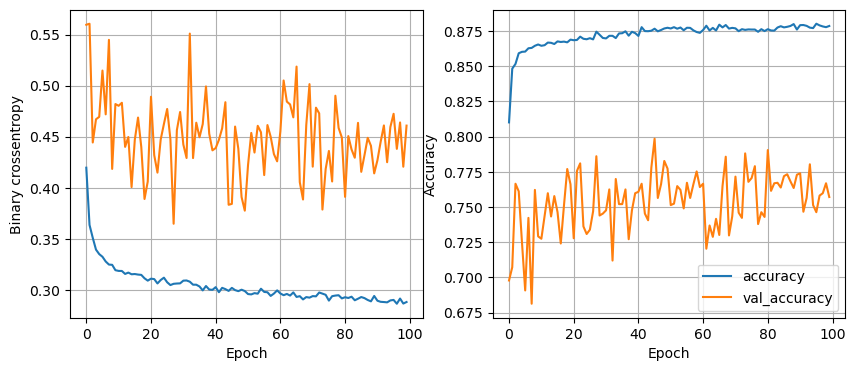

119/119 [==============================] - 0s 4ms/step - loss: 0.3186 - accuracy: 0.8717
32 nodes, drop 0.2, lr 0.005, batch_size 64


2022-11-26 09:58:33.152077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 09:58:34.783902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


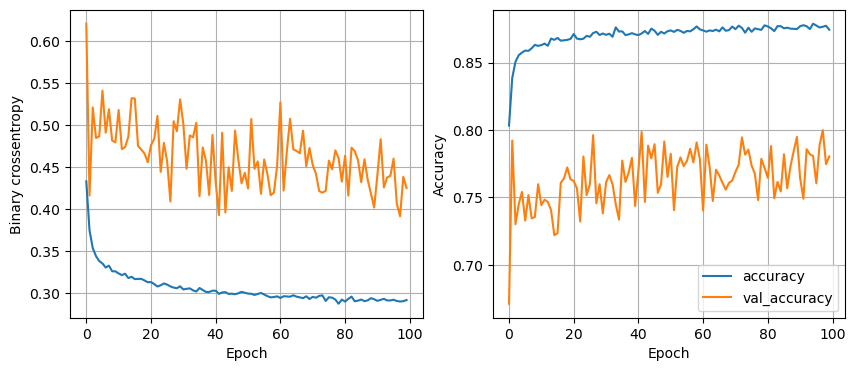

119/119 [==============================] - 1s 4ms/step - loss: 0.3176 - accuracy: 0.8707
32 nodes, drop 0.2, lr 0.005, batch_size 128


2022-11-26 10:00:07.025526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 10:00:08.255064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


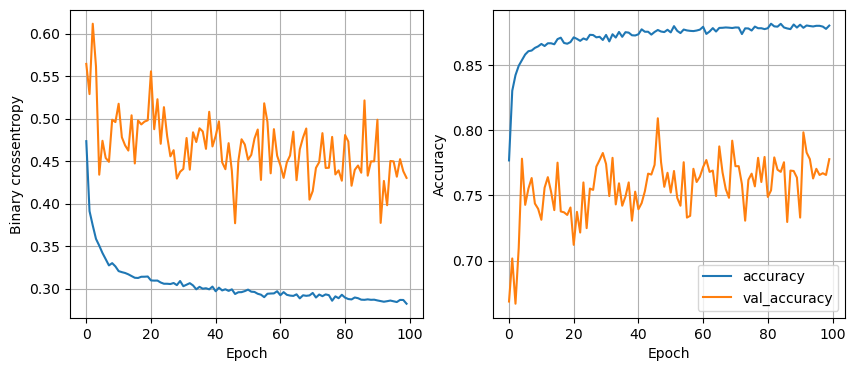

119/119 [==============================] - 1s 4ms/step - loss: 0.3196 - accuracy: 0.8722
32 nodes, drop 0.2, lr 0.001, batch_size 32


2022-11-26 10:00:55.752894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 10:00:58.278647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


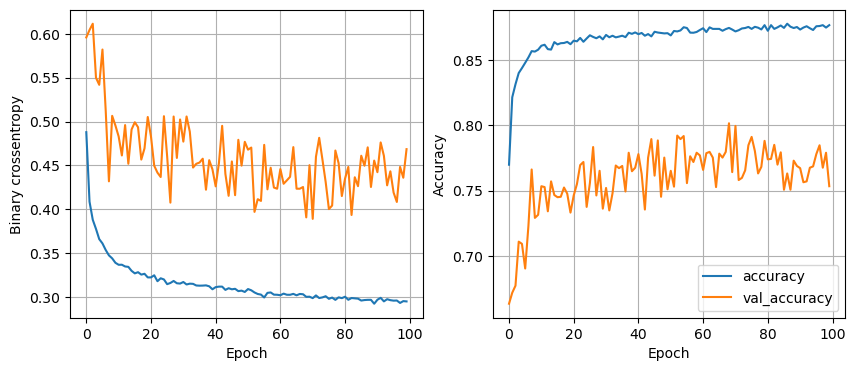

119/119 [==============================] - 0s 4ms/step - loss: 0.3159 - accuracy: 0.8709
32 nodes, drop 0.2, lr 0.001, batch_size 64


2022-11-26 10:58:33.604156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 10:58:35.249436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


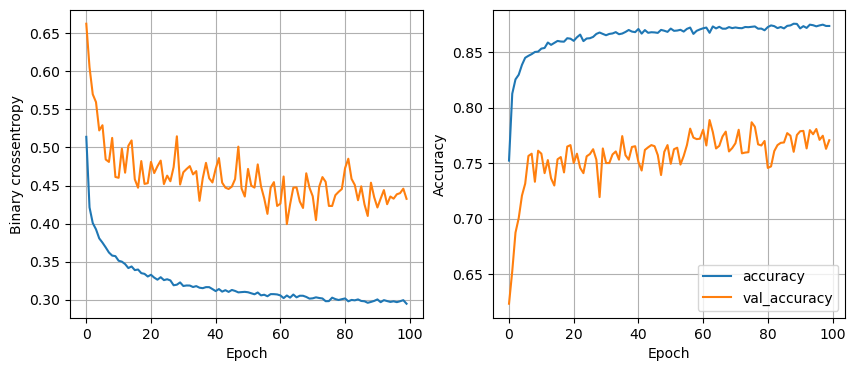

119/119 [==============================] - 1s 4ms/step - loss: 0.3200 - accuracy: 0.8688
32 nodes, drop 0.2, lr 0.001, batch_size 128


2022-11-26 11:00:05.895966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:00:07.088085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


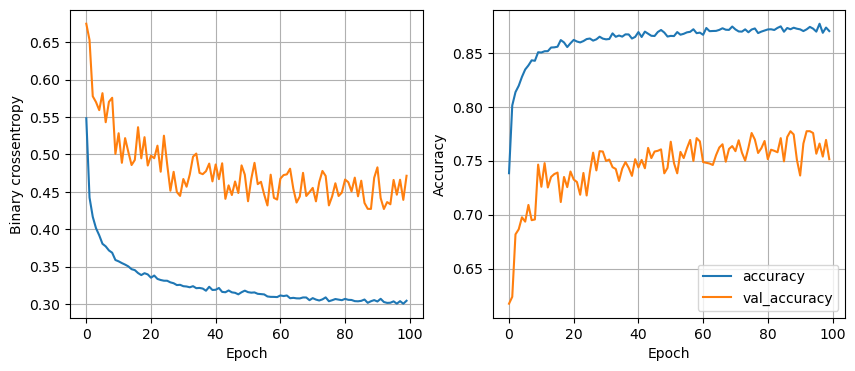

119/119 [==============================] - 1s 4ms/step - loss: 0.3130 - accuracy: 0.8712
64 nodes, drop 0, lr 0.01, batch_size 32


2022-11-26 11:08:01.607631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:08:03.855333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


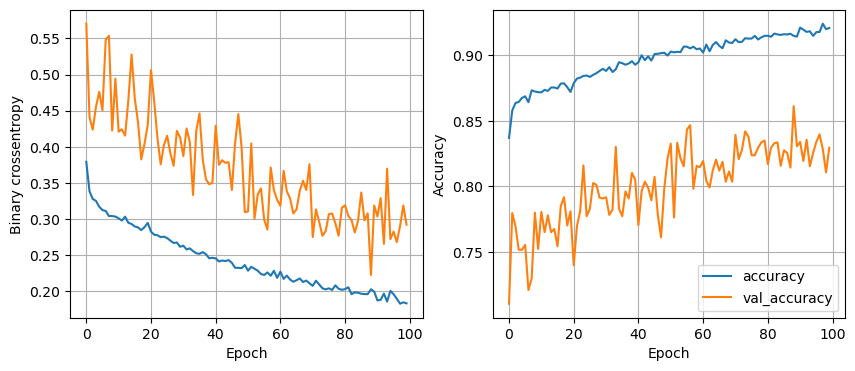

119/119 [==============================] - 0s 4ms/step - loss: 0.6373 - accuracy: 0.8575
64 nodes, drop 0, lr 0.01, batch_size 64


2022-11-26 11:10:57.764688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:10:59.183845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


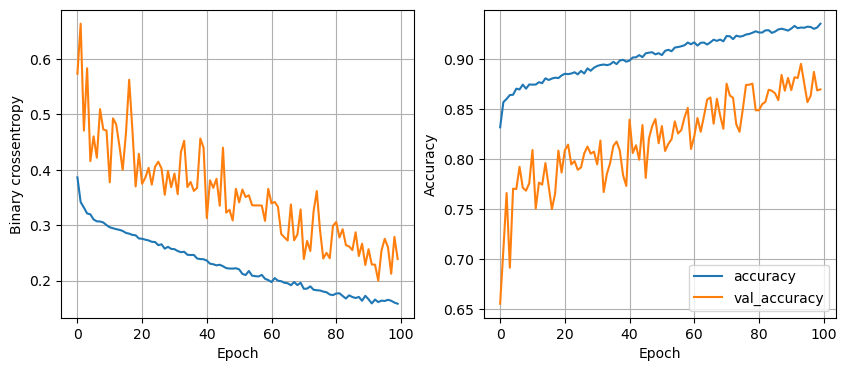

119/119 [==============================] - 1s 4ms/step - loss: 0.5934 - accuracy: 0.8536
64 nodes, drop 0, lr 0.01, batch_size 128


2022-11-26 11:12:24.695917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:12:25.757352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


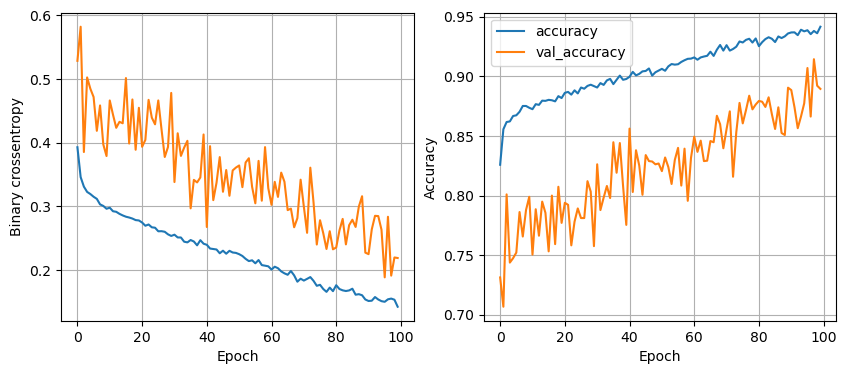

119/119 [==============================] - 2s 18ms/step - loss: 0.6348 - accuracy: 0.8454
64 nodes, drop 0, lr 0.005, batch_size 32


2022-11-26 11:13:11.454619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:13:13.628540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


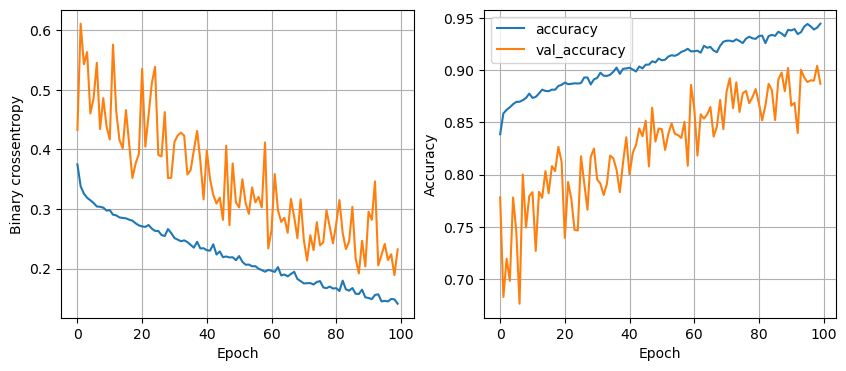

119/119 [==============================] - 0s 4ms/step - loss: 0.5871 - accuracy: 0.8615
64 nodes, drop 0, lr 0.005, batch_size 64


2022-11-26 11:16:01.840024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:16:03.240685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


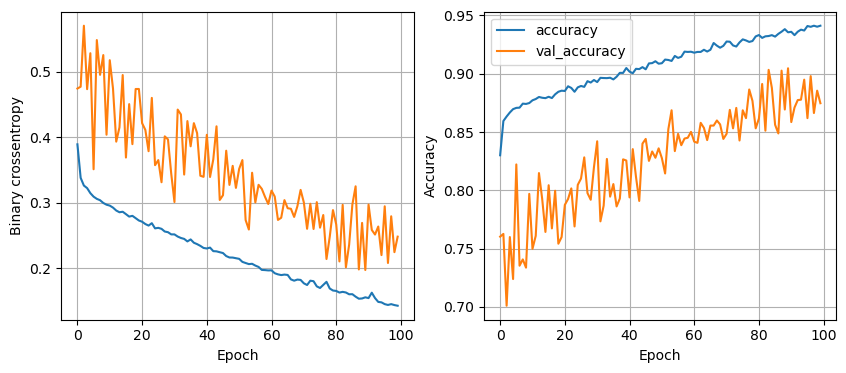

119/119 [==============================] - 1s 5ms/step - loss: 0.5905 - accuracy: 0.8583
64 nodes, drop 0, lr 0.005, batch_size 128


2022-11-26 11:17:29.477094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:17:30.564589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


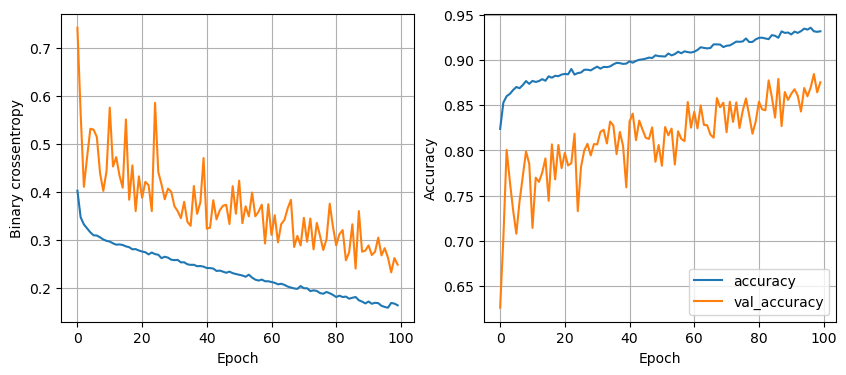

119/119 [==============================] - 1s 5ms/step - loss: 0.5395 - accuracy: 0.8612
64 nodes, drop 0, lr 0.001, batch_size 32


2022-11-26 11:18:14.797169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:18:17.022921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


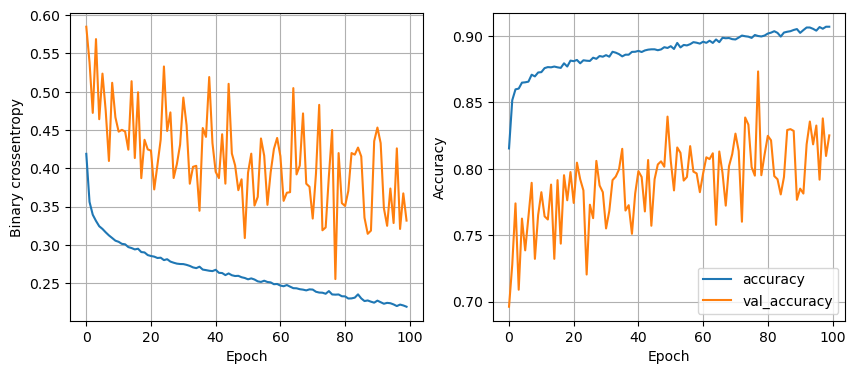

119/119 [==============================] - 0s 4ms/step - loss: 0.3639 - accuracy: 0.8693
64 nodes, drop 0, lr 0.001, batch_size 64


2022-11-26 11:22:19.505173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:22:20.903444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


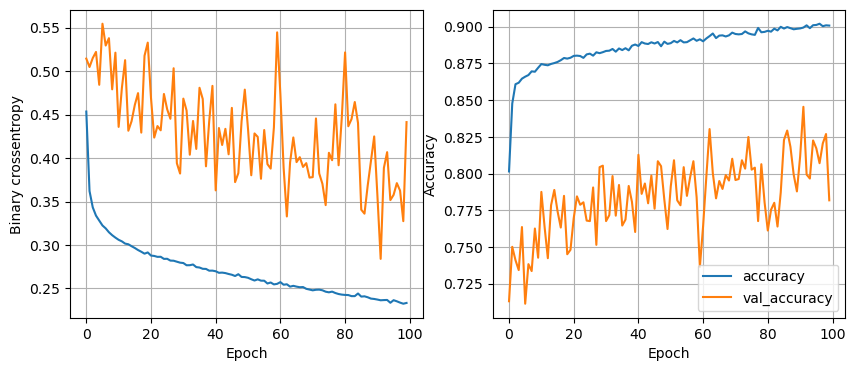

119/119 [==============================] - 1s 4ms/step - loss: 0.3522 - accuracy: 0.8678
64 nodes, drop 0, lr 0.001, batch_size 128


2022-11-26 11:23:46.544540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:23:47.632604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


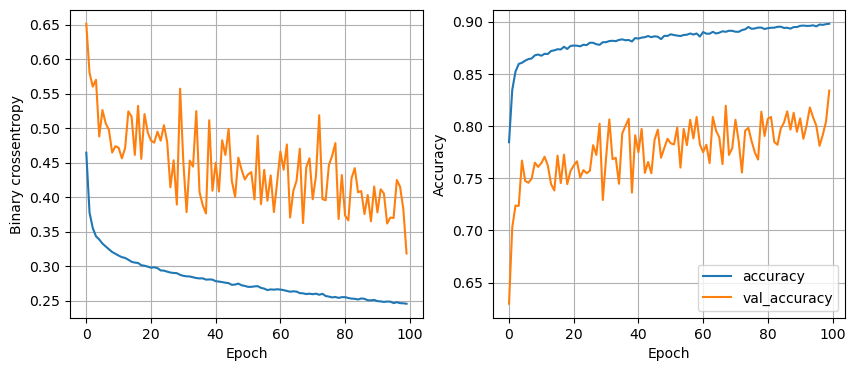

119/119 [==============================] - 1s 4ms/step - loss: 0.3450 - accuracy: 0.8665
64 nodes, drop 0.2, lr 0.01, batch_size 32


2022-11-26 11:25:03.536292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:25:06.062093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


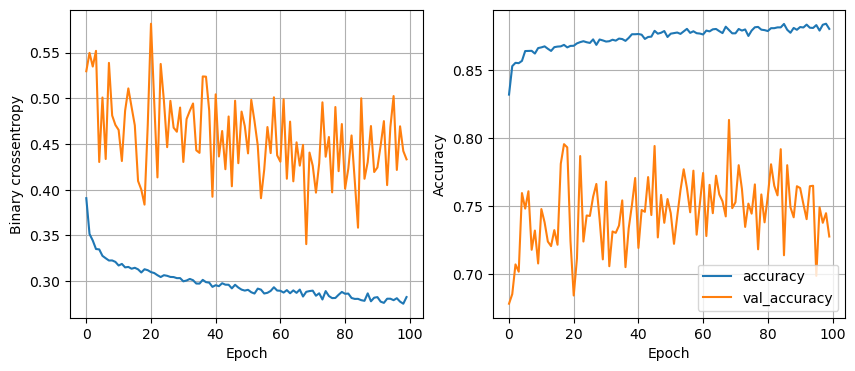

119/119 [==============================] - 0s 4ms/step - loss: 0.3356 - accuracy: 0.8675
64 nodes, drop 0.2, lr 0.01, batch_size 64


2022-11-26 11:35:44.554527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:35:46.231322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


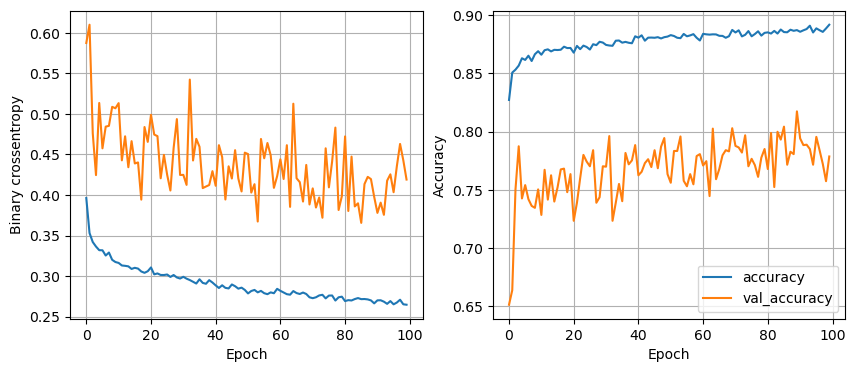

119/119 [==============================] - 1s 4ms/step - loss: 0.3210 - accuracy: 0.8722
64 nodes, drop 0.2, lr 0.01, batch_size 128


2022-11-26 11:37:18.009791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:37:19.257795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


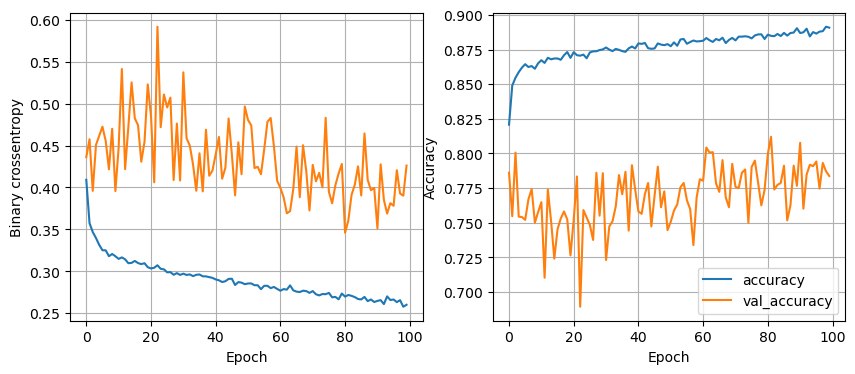

119/119 [==============================] - 1s 5ms/step - loss: 0.3282 - accuracy: 0.8741
64 nodes, drop 0.2, lr 0.005, batch_size 32


2022-11-26 11:38:06.845535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:38:09.286812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


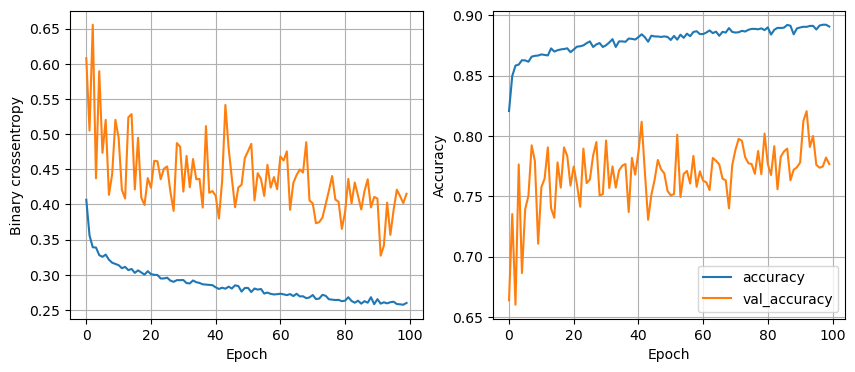

119/119 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 0.8741
64 nodes, drop 0.2, lr 0.005, batch_size 64


2022-11-26 11:41:09.986668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:41:11.590691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


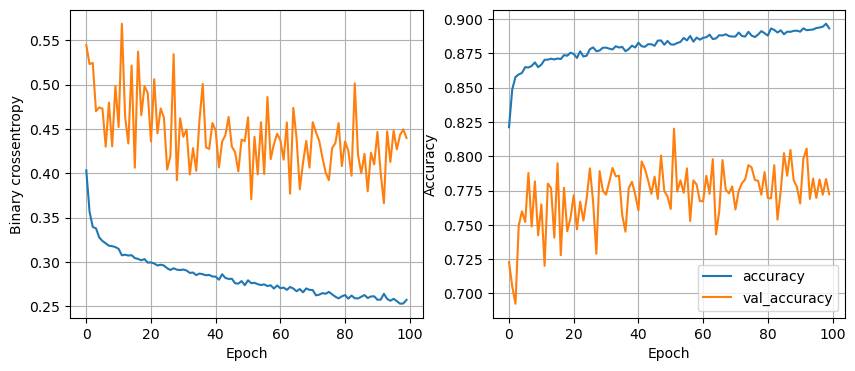

119/119 [==============================] - 1s 4ms/step - loss: 0.3206 - accuracy: 0.8762
64 nodes, drop 0.2, lr 0.005, batch_size 128


2022-11-26 11:42:43.567766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:42:44.740488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


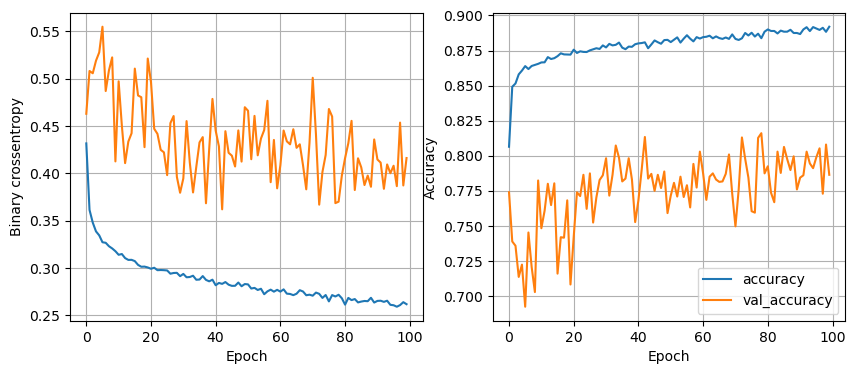

119/119 [==============================] - 1s 4ms/step - loss: 0.3146 - accuracy: 0.8749
64 nodes, drop 0.2, lr 0.001, batch_size 32


2022-11-26 11:43:32.814632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:43:35.212593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


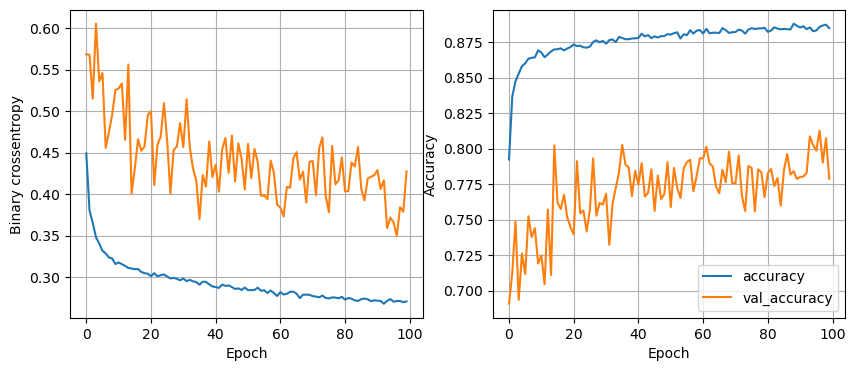

119/119 [==============================] - 0s 4ms/step - loss: 0.3197 - accuracy: 0.8720
64 nodes, drop 0.2, lr 0.001, batch_size 64


2022-11-26 11:46:33.709912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:46:35.222757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


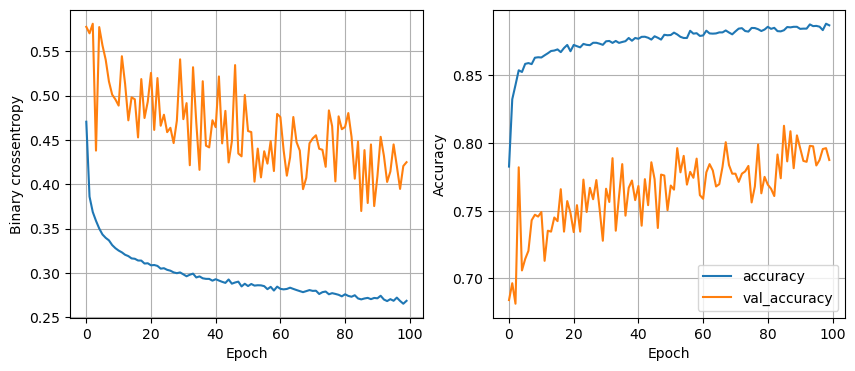

119/119 [==============================] - 1s 4ms/step - loss: 0.3180 - accuracy: 0.8730
64 nodes, drop 0.2, lr 0.001, batch_size 128


2022-11-26 11:48:05.313551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-26 11:48:06.706748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


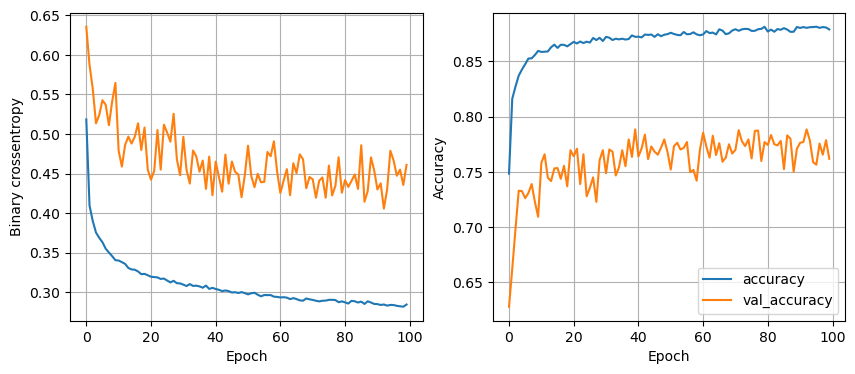

119/119 [==============================] - 1s 4ms/step - loss: 0.3129 - accuracy: 0.8730


In [99]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, drop {dropout_prob}, lr {lr}, batch_size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss, val_accuracy = model.evaluate(X_valid, y_valid)
                
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model
            

In [101]:
y_pred_nn = least_loss_model.predict(X_test)
y_pred_nn_proba = (y_pred > 0.5).astype(int).reshape(-1, 1)

119/119 [==============================] - 0s 1ms/step


In [102]:
print(classification_report(y_test, y_pred_nn_proba))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1357
           1       0.85      0.86      0.85      2447

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804

